[![Open notebook in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/afondiel/computer-science-notebook/tree/master/core/systems/edge-computing/edge-ai/lab/examples/deploy-with-tensorRT/notebooks/Intro_to_TensorFlow_TensorRT.ipynb)

<h2 align=center> Optimize TensorFlow Models For Deployment with TensorRT</h2>

In this project, you will learn how to use the TensorFlow integration for TensorRT (also known as TF-TRT) to increase inference performance.

### Learning Objectives

By the time you complete this project, you will be able to:

- Optimize Tensorflow models using TF-TRT
- Use TF-TRT to optimize several deep learning models at FP32, FP16, and INT8 precision
- Observe how tuning TF-TRT parameters affects performance and inference throughput


### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with Deep Learning, and understand what **inference** is
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and TensorRT Runtime
- **[Task 3]()**: Load the Data and Pre-trained Model
- **[Task 4]()**: Create Batched Input
- **[Task 5]()**: Load TensorFlow SavedModel
- **[Task 6]()**: Get Baseline for Prediction Throughput and Accuracy
- **[Task 7]()**: Convert a TensorFlow saved model into a TF-TRT Float32 Optimized Graph
- **[Task 8]()**: Benchmark TF-TRT Float32
- **[Task 9]()**: Convert to TF-TRT Float16 and Benchmark
- **[Task 10]()**: TF-TRT INT8 Model
- **[Task 11]()**: Converting to TF-TRT INT8
- **[Task 12]()**: Benchmark TF-TRT INT8

## **Task 2: Setup your TensorFlow and TensorRT Runtime.**

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


## Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)

(This is old colab UI)

In [ ]:
!nvidia-smi

Thu Apr  3 09:13:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [ ]:
# print(tf.config.list_physical_devices('GPU'))

### Install TensorFlow-GPU 2.0 and TensorRT Runtime

In [ ]:
# !pip install -q tensorrt --upgrade
# !pip install -q tensorflow --upgrade
# !pip install -q tf-keras --upgrade

In [ ]:
# Troubelshooting
# !pip uninstall tensorflow -y
# !pip uninstall tensorflow tensorflow-gpu tensorflow[and-cuda] -y

In [ ]:
# !pip install tensorflow[and-cuda]
# !pip install tensorflow==2.12.0


In [ ]:
# !pip install --upgrade numpy

In [ ]:
# !pip cache purge

In [ ]:
# !pip install --upgrade --index-url https://pypi.ngc.nvidia.com nvidia-tensorrt==8.4.3.1
# !pip install --upgrade --index-url https://pypi.ngc.nvidia.com nvidia-tensorrt
!pip install tensorrt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.2 MB/s eta 0:00:00
  Created wheel for tensorrt: filename=tensorrt-10.9.0.34-py2.py3-none-any.whl size=46629 sha256=f4f6b9b7863e77f18b6c77bba3582ac982df5a0af1c1013667f3fdbdd80a8ab6
  Stored in directory: /root/.cache/pip/wheels/3a/4d/72/f28cb367f1435d026243047d4f60fde8f1c9cbb06a204f842f
  Created wheel for tensorrt_cu12: filename=tensorrt_cu12-10.9.0.34-py2.py3-none-any.whl size=17466 sha256=b7127b28b4ebfc359ca2daf1ecf0518965f6aec63c7de25b67846a9abe36bea4
  Stored in directory: /root/.cache/pip/wheels/75/09/76/6b405075fe4c04097f5713ec0a688df7892aaee823bc141952
  Created wheel for tensorrt_cu12_libs: filename=tensorrt_cu12_libs-10.9.0.34-

In [ ]:
import tensorflow as tf
import tensorrt as trt

print("TensorFlow version:", tf.__version__)
print("TensorRT version:", trt.__version__)


TensorFlow version: 2.18.0
TensorRT version: 10.9.0.34


## Restart the Runtime

**Note**
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)



### Importing required libraries

In [ ]:
# Re-run after Kernel restart
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.compiler.tensorrt import trt_convert as trt
from tensorflow.python.saved_model import tag_constants
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

## **Task 3: Load the Data and Pre-trained Model**

### Data
We download several random images for testing from the Internet.

In [ ]:
!mkdir ./data
!wget  -qO ./data/img0.JPG "https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Golden_Retriever_Carlos_%2810581910556%29.jpg/640px-Golden_Retriever_Carlos_%2810581910556%29.jpg"
!wget  -qO ./data/img1.JPG "https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Red-shouldered_Hawk_%28Buteo_lineatus%29_-_Blue_Cypress_Lake%2C_Florida.jpg/407px-Red-shouldered_Hawk_%28Buteo_lineatus%29_-_Blue_Cypress_Lake%2C_Florida.jpg"
!wget  -qO ./data/img2.JPG "https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Ostrich_male_RWD.jpg/636px-Ostrich_male_RWD.jpg"
!wget  -qO ./data/img3.JPG "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Working_pay_phone%2C_Jensen_Beach%2C_Florida%2C_September_4%2C_2012_001.JPG/360px-Working_pay_phone%2C_Jensen_Beach%2C_Florida%2C_September_4%2C_2012_001.JPG"

### Model

Thoughout this project, we will be using InceptionV3. Here we import the model from Keras.
- [InceptionV3 - Keras Doc](https://keras.io/api/applications/inceptionv3/)

In [ ]:
model=InceptionV3(weights='imagenet')

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
./data/img0.JPG - Predicted: [('n02099601', 'golden_retriever', np.float32(0.7223455)), ('n02099712', 'Labrador_retriever', np.float32(0.120114416)), ('n02104029', 'kuvasz', np.float32(0.021440027))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
./data/img1.JPG - Predicted: [('n01608432', 'kite', np.float32(0.9786083)), ('n01807496', 'partridge', np.float32(0.0015346085)), ('n01798484', 'prairie_chicken', np.float32(0.0006949885))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
./data/img2.JPG - Predicted: [('n01518878', 'ostrich', np.float32(0.8989566)), ('n02018795', 'bustard', np.float32(0.002933125)), ('n02437616', 'llama', np.float32(0.001068746))]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
./data/img3.JPG - Predicted: [('n03902125', 'pay-phone', np.float32(0.98863834)), ('n03187595', 'dial_telephone', np.float32(0.008258097)), ('n02977058', 'cash_machine', np.float32(4.407692e-05))]


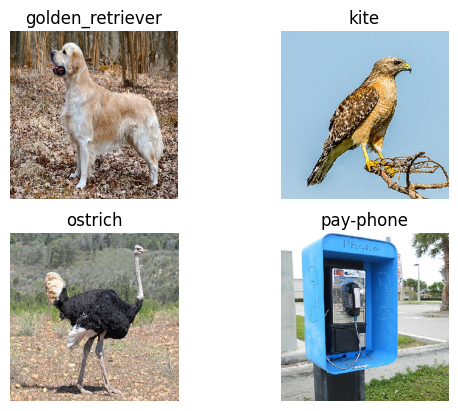

In [ ]:
def show_predictions(model):
  for i in range(4):
    img_path = './data/img%d.JPG'%i
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    print('{} - Predicted: {}'.format(img_path, decode_predictions(preds, top=3)[0]))

    plt.subplot(2,2,i+1)
    plt.imshow(img);
    plt.axis('off');
    plt.title(decode_predictions(preds, top=3)[0][0][1])
show_predictions(model)

When we benchmark our optimized TF-TRT models, they will be saved TensorFlow (not Keras) models. In order to have a fair comparison, here we save our Keras model as a TensorFlow model

In [ ]:
# Save the entire model as a TensorFlow SavedModel.
tf.saved_model.save(model, 'inceptionv3_saved_model')

In [ ]:
!saved_model_cli show --dir inceptionv3_saved_model --all

2025-04-02 16:38:07.117561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743611887.137956    7519 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743611887.143636    7519 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The 

## **Task 4: Create Batched Input**

Using **batch inference** to send many images to the GPU at once promotes parallel processing and improve throughput.

The `batch_input` helper function takes a batch_size, and returns a tensor with the preprocessed images.

- [Image Classification Batch Inference with PyTorch with Ray](https://docs.ray.io/en/latest/data/examples/pytorch_resnet_batch_prediction.html)
- [Inference using Hugging Face Batch mapping](https://huggingface.co/docs/datasets/about_map_batch)
  - [ general process guide](https://huggingface.co/docs/datasets/process)

In [ ]:
# Re-run after Kernel restart
def batch_input(batch_size=8):
  batched_input = np.zeros((batch_size, 299, 299, 3), dtype=np.float32)
  for i in range(batch_size):
    img_path = "/content/data/img%d.JPG" % (i % 4)
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    batched_input[i, :] = x
  batched_input = tf.constant(batched_input)
  return batched_input


In [ ]:
# Re-run after Kernel restart
batched_input = batch_input(batch_size=32)

batched_input.shape

In [ ]:
type(batched_input)

## **Task 5: Load TensorFlow SavedModel**
- [Using the SavedModel format - Documentation](https://www.tensorflow.org/guide/saved_model)

In [ ]:
# Re-run after Kernel restart
def load_tf_saved_model(model_dir_path):
  print(f'Loading saved model: {model_dir_path} ...')
  saved_model_loaded = tf.saved_model.load(model_dir_path, tags=[tag_constants.SERVING])
  # infer = saved_model_loaded.signatures['serving_default']
  return saved_model_loaded


Here we load a previously saved InceptionV3 model.

In [ ]:
saved_model_loaded = load_tf_saved_model('inceptionv3_saved_model')

In [ ]:
infer = saved_model_loaded.signatures['serving_default']

print(infer.structured_outputs)

## **Task 6: Get Baseline for Prediction** **Throughput** and **Accuracy**

### Naive Inference with TensorFlow 2

The following will serve as a baseline for prediction throughput and accuracy. Now we perform inference with the optimized graph, and after a warmup, time and calculate throughput.

The helper function `predict_and_benchmark_throughput` will use the passed in model to perform predictions on the passed in batched input over a number of runs. It measures and reports throughput, as well as time for ranges of runs.

Due to GPU initialization operations, we do not want to profile against initial inference -- so we can set a number of warmup runs to perform prior to benchmarking.

`predict_and_benchmark_throughput` returns the predictions for all images for all runs, after the warmup.

In [ ]:
# Re-run after Kernel restart

def predict_and_benchmark_throughput(batched_input, infer, N_warmup_run=50, N_run=1000):

  elapsed_time = []
  all_preds = []
  batch_size = batched_input.shape[0]

  for i in range(N_warmup_run):
    labeling = infer(batched_input)
    preds = labeling['predictions'].numpy()

  for i in range(N_run):
    start_time = time.time()

    labeling = infer(batched_input)

    preds = labeling['predictions'].numpy()

    end_time = time.time()

    elapsed_time = np.append(elapsed_time, end_time - start_time)

    all_preds.append(preds)

    if i % 50 == 0:
      print('Steps {}-{} average: {:4.1f}ms'.format(i, i+50, (elapsed_time[-50:].mean()) * 1000))

  print('Throughput: {:.0f} images/s'.format(N_run * batch_size / elapsed_time.sum()))
  return all_preds

In [ ]:
all_preds = predict_and_benchmark_throughput(batched_input,
                                     infer,
                                     N_warmup_run=50,
                                     N_run=1000)

### Observe Accuracy

**NOTE:** We are not so concerned in this project about the accuracy of our predictions per se, only that they remain consistent as we optimize our models.

In [ ]:
# Re-run after Kernel restart
def show_predictions(model):

  img_path = './data/img0.JPG'  # golden_retriever
  img = image.load_img(img_path, target_size=(299, 299))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  x = tf.constant(x)

  labeling = model(x)
  # preds = labeling['output_0'].numpy() # modern version
  preds = labeling['predictions'].numpy()

  # decode the results into a list of tuples (class, description, probability)
  # (one such list for each sample in the batch)
  print('{} - Predicted: {}'.format(img_path, decode_predictions(preds, top=3)[0]))
  plt.subplot(2,2,1)
  plt.imshow(img);
  plt.axis('off');
  plt.title(decode_predictions(preds, top=3)[0][0][1])

In [ ]:
show_predictions(infer)

Before going to the next Task, please execute the cell below to restart the kernel and clear GPU memory.

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

### Network Transformation

TF-TRT performs several important transformations and optimizations to the neural network graph. First, layers with unused outputs are eliminated to avoid unnecessary computation. Next, where possible, convolution, bias, and ReLU layers are fused to form a single layer.

**Figure (a)** shows a typical convolutional network before optimization and

**Figure (c)** shows the result of this vertical layer fusion on the original network from Figure (a) (fused layers are labeled CBR). Layer fusion improves the efficiency of running TF-TRT networks on the GPU.

**Figure (b)** Another transformation is horizontal layer fusion, or layer aggregation, along with the required division of aggregated layers to their respective outputs, as Figure (b) shows.

Horizontal layer fusion improves performance by combining layers that take the same source tensor and apply the same operations with similar parameters, resulting in a single larger layer for higher computational efficiency. The example in Figure (b) shows the combination of 3 1×1 CBR layers from Figure (a) that take the same input into a single larger 1×1 CBR layer. Note that the output of this layer must be disaggregated to feed into the different subsequent layers from the original input graph.

*Source*: [Speed up TensorFlow Inference on GPUs with TensorRT](https://blog.tensorflow.org/2018/04/speed-up-tensorflow-inference-on-gpus-tensorRT.html)

<div align="center">
    <img width="700px" src='https://2.bp.blogspot.com/-nc-poLV8CNc/XhOI1wfgGjI/AAAAAAAACQI/3FlNTSKKrqMyTzR5XC5RCNnVuUY5EGmhQCLcBGAsYHQ/s1600/fig2.png' />
    <p style="text-align: center;color:gray">Figure (a): An example convolutional  model with multiple convolutional and activation layers before optimization</p>
    <p style="text-align: center;color:gray">Figure (b): Horizontal layer fusion</p>
</div>

[Source](https://www.slideshare.net/cfregly/advanced-spark-and-tensorflow-meetup-20170506-reduced-precision-fp16-int8-inference-on-convolutional-neural-networks-with-tensorrt-and-nvidia-pascal-from-chris-gottbrath-nvidia): Advanced Spark and TensorFlow Meetup 2017-05-06 Reduced Precision (FP16, INT8) Inference on Convolutional Neural Networks with TensorRT and NVIDIA Pascal from Chris Gottbrath, Nvidia

<div align="center">
    <img width="600px" src='https://image.slidesharecdn.com/tensorrt-for-spark-tensorflow-meetup-final-170408190710/95/advanced-spark-and-tensorflow-meetup-20170506-reduced-precision-fp16-int8-inference-on-convolutional-neural-networks-with-tensorrt-and-nvidia-pascal-from-chris-gottbrath-nvidia-45-638.jpg' />
    <p style="text-align: center;color:gray"> Figure (c). Vertical layer fusion </p>
</div>

When optimizing a TensorFlow model, TF-TRT can optimize either a subgraph or the entire graph definition. This capability allows the optimization procedure to be applied to the graph where possible and skip the non-supported graph segments. As a result, if the existing model contains a non-supported layer or operation, TensorFlow can still optimize the graph.

Please see the [TF-TRT User Guide](https://docs.nvidia.com/deeplearning/frameworks/tf-trt-user-guide/index.html#supported-ops) for a full list of supported operators.

## TF-TRT Workflow:

Below, you can see a typical workflow of TF-TRT:

[Source](https://medium.com/tensorflow/high-performance-inference-with-tensorrt-integration-c4d78795fbfe): High performance inference with TensorRT Integration

<div align="center">
    <img width="600px" src='https://miro.medium.com/max/875/1*hD_4k9bTEXnjuLHcaoFQRQ.png' />
</div>

<div align="center">
    <img width="600px" src='https://miro.medium.com/max/875/1*DwxO-QF6Bz-H4aurRBIrjw.png' />
</div>

We now turn to the syntax for this one additional Optimize with TF-TRT step.

## Graph Conversion

To perform graph conversion, we use `TrtGraphConverterV2`, passing it the directory of a saved model, and any updates we wish to make to its conversion parameters.

```python
from tensorflow.python.compiler.tensorrt import trt_convert as trt

trt.TrtGraphConverterV2(
    input_saved_model_dir=None,
    conversion_params=TrtConversionParams(precision_mode='FP32',
                                          max_batch_size=1
                                          minimum_segment_size=3,
                                          max_workspace_size_bytes=8000000000,
                                          use_calibration=True,
                                          maximum_cached_engines=1,
                                          is_dynamic_op=True,
                                          rewriter_config_template=None,
                                         )
```

### Conversion Parameters

Here is additional information about the most frequently adjusted conversion parameters.

* __precision_mode__: This parameter sets the precision mode; which can be one of FP32, FP16, or INT8. Precision lower than FP32, meaning FP16 and INT8, would improve the performance of inference. The FP16 mode uses Tensor Cores or half precision hardware instructions, if possible. The INT8 precision mode uses integer hardware instructions.

* __max_batch_size__: This parameter is the maximum batch size for which TF-TRT will optimize. At runtime, a smaller batch size may be chosen, but, not a larger one.

* __minimum_segment_size__: This parameter determines the minimum number of TensorFlow nodes in a TF-TRT engine, which means the TensorFlow subgraphs that have fewer nodes than this number will not be converted to TensorRT. Therefore, in general, smaller numbers such as 5 are preferred. This can also be used to change the minimum number of nodes in the optimized INT8 engines to change the final optimized graph to fine tune result accuracy.

* __max_workspace_size_bytes__: TF-TRT operators often require temporary workspace. This parameter limits the maximum size that any layer in the network can use. If insufficient scratch is provided, it is possible that TF-TRT may not be able to find an implementation for a given layer.

## **Task 7: Convert a TensorFlow saved model into a TF-TRT Float32 Graph**

Convert a TensorFlow saved model into a TF-TRT optimized graph using Float32 precision. We will use the optimized graph to make predictions and will benchmark its performance.

Only a few lines of code are needed to use TF-TRT
```python
from tensorflow.python.compiler.tensorrt import trt_convert as trt

conversion_params = trt.DEFAULT_TRT_CONVERSION_PARAMS._replace(
  precision_mode=trt.TrtPrecisionMode.<FP16 or FP32>
  max_workspace_bytes=8000000000
)

converter = trt.TrtGraphConverterV2(
  input_saved_model_dir=input_saved_model_dir,
  conversion_params=conversion_params
)

converter.convert()

converter.save(output_saved_model_dir)
```

In [ ]:
# Re-run after Kernel restart
def convert_to_trt_graph_and_save(input_saved_model_dir='inceptionv3_saved_model',
                                  precision_mode='float32',
                                  calibration_data=batched_input):
  if precision_mode == 'float32':
    precision_mode=trt.TrtPrecisionMode.FP32
    converted_saved_suffix = '_TFTRT_FP32'
  # elif precision_mode == 'float16':
  #   precision_mode=trt.TrtPrecisionMode.FP16
  #   converted_saved_suffix = '_TFTRT_FP16'

  output_saved_model_dir = input_saved_model_dir + converted_saved_suffix

  conversion_params = trt.DEFAULT_TRT_CONVERSION_PARAMS._replace(
    precision_mode=precision_mode,
    # max_workspace_bytes=8000000000
    max_workspace_size_bytes=8000000000
  )

  converter = trt.TrtGraphConverterV2(
    input_saved_model_dir=input_saved_model_dir,
    conversion_params=conversion_params
  )

  print('Converting {} to TF-TRT {}...'.format(input_saved_model_dir, precision_mode))
  converter.save(output_saved_model_dir)
  print('Saving converted model {}...'.format(output_saved_model_dir))


In [ ]:
convert_to_trt_graph_and_save(
    input_saved_model_dir='inceptionv3_saved_model',
    precision_mode='float32',
    calibration_data=batched_input
)

## **Task 8: Benchmark TF-TRT Float32**

Load the optimized TF model.

In [ ]:
saved_model_loaded = load_tf_saved_model('inceptionv3_saved_model_TFTRT_FP32')
infer = saved_model_loaded.signatures['serving_default']

Perform inference with the optimized graph, and after a warmup, time and calculate throughput.

In [ ]:
all_preds = predict_and_benchmark_throughput(batched_input,
                                     infer,
                                     N_warmup_run=50,
                                     N_run=1000)

In [ ]:
show_predictions(infer)

# Task 9: Convert to TF-TRT Float16 and Benchmark

In this task, you will update the convert_to_trt_graph_and_save function you worked with in the last task to be able to also perform conversion for Float16 precision.

In [ ]:
# Re-run after Kernel restart
def convert_to_trt_graph_and_save(input_saved_model_dir='inceptionv3_saved_model',
                                  precision_mode='float32',
                                  calibration_data=batched_input):
  if precision_mode == 'float32':
    precision_mode=trt.TrtPrecisionMode.FP32
    converted_saved_suffix = '_TFTRT_FP32'
  elif precision_mode == 'float16':
    precision_mode=trt.TrtPrecisionMode.FP16
    converted_saved_suffix = '_TFTRT_FP16'

  output_saved_model_dir = input_saved_model_dir + converted_saved_suffix

  conversion_params = trt.DEFAULT_TRT_CONVERSION_PARAMS._replace(
    precision_mode=precision_mode,
    # max_workspace_bytes=8000000000
    max_workspace_size_bytes=8000000000
  )

  converter = trt.TrtGraphConverterV2(
    input_saved_model_dir=input_saved_model_dir,
    conversion_params=conversion_params
  )

  print('Converting {} to TF-TRT {}...'.format(input_saved_model_dir, precision_mode))
  converter.save(output_saved_model_dir)
  print('Saving converted model {}...'.format(output_saved_model_dir))


In [ ]:
convert_to_trt_graph_and_save(
    input_saved_model_dir='inceptionv3_saved_model',
    precision_mode='float16',
    calibration_data=batched_input
)

Load the optimized TF model.

In [ ]:
saved_model_loaded = load_tf_saved_model('inceptionv3_saved_model_TFTRT_FP16')
infer = saved_model_loaded.signatures['serving_default']

Perform inference with the optimized graph, and after a warmup, time and calculate throughput.

In [ ]:
all_preds = predict_and_benchmark_throughput(batched_input,
                                     infer,
                                     N_warmup_run=50,
                                     N_run=1000)

In [ ]:
show_predictions(infer)

Before going to the next Task, please execute the cell below to restart the kernel and clear GPU memory.

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

## Task 10: TF-TRT INT8 Model

We will discuss how TF-TRT is able to optimize to use Int8 precision.

## Benefits of Reduced Precision Inference

Typically, model training is performed using 32-bit floating point mathematics. Due to the backpropagation algorithm and weights updates, this high precision is necessary to allow for model convergence. Once trained, inference could be done in reduced precision (e.g. FP16) as the neural network architecture only requires a feed-forward network.

Reducing numerical precision allows for a smaller model with faster inferencing time, lower memory requirements, and more throughput.

Furthermore, recent NVIDIA GPUs are capable of executing 8-bit integer 4-element vector dot product instructions to accelerate deep neural network inference.

[Source](https://developer.nvidia.com/blog/int8-inference-autonomous-vehicles-tensorrt/): Fast INT8 Inference for Autonomous Vehicles with TensorRT 3

<div align="center">
    <img src='https://developer.nvidia.com/blog/wp-content/uploads/2017/12/dp4a-updated.png' />
    <p style="text-align: center;color:gray"> Figure (d). The DP4A instruction: 4-element dot product with accumulation.</p>
</div>

## Reduced Dynamic Range of INT8

"While this new instruction provides faster computation, there is a significant challenge in representing weights and activations of deep neural networks in this reduced INT8 format. As *Table 1* shows, the dynamic range and granularity of representable values for INT8 is significantly limited compared to FP32 or FP16." [Source](https://developer.nvidia.com/blog/int8-inference-autonomous-vehicles-tensorrt/)

[Source](https://on-demand.gputechconf.com/gtc/2017/presentation/s7310-8-bit-inference-with-tensorrt.pdf): 8-bit Inference with TensorRT

<div align="center">
    <img src='https://kezunlin.me/images/posts/635233-20181119142909032-2033014099.png' />
    <p style="text-align: center;color:gray"> Table 1. Dynamic range of FP32, FP16 and INT8.</p>
</div>

## TF-TRT INT8 Quantization

You might be wondering how it is possible to take a model which operates in 32 bit floating point precision, where you can represent billions of different numbers, and reduce that to only 8 bit integers which can only represent 256 possible values.

The main reason is that, typically in deep learning, the values of weights and activations lie in very small ranges. So if we design our precious 8 bits to only represent this specific small range, we can usually maintain good accuracy while reducing the rounding error.

The main challenge is to find the correct dynamic range of the inputs. TF-TRT uses a calibration process that minimizes the information loss when approximating the FP32 network with a limited 8-bit integer representation. In the next Task, you will see how to perform this calibration process.

[Source](https://blog.tensorflow.org/2019/06/high-performance-inference-with-TensorRT.html): High performance inference with TensorRT Integration

<div align="center">
    <img width="600px" src='https://2.bp.blogspot.com/-UiS1VGo7zwQ/XflUnggwnYI/AAAAAAAAB5g/yU5qOXVfWw0x8oYaKyRcd4AKsbBltU64ACLcBGAsYHQ/s1600/fig7.png' />
</div>

Further quantization details: [https://developer.nvidia.com/gtc/2019/video/S9431/video](https://developer.nvidia.com/gtc/2019/video/S9431/video)

### Calibration Dataset Considerations

When preparing the calibration dataset, you should capture the expected distribution of data in typical inference scenarios. You need to make sure that the calibration dataset covers all the expected scenarios, for example, clear weather, rainy day, night scenes, etc. When examining your own dataset, you should create a separate calibration dataset. The calibration dataset shouldn’t overlap with the training, validation or test datasets.

## Task 11: Converting to TF-TRT INT8

You will convert a TensorFlow saved model into a TF-TRT optimized graph using INT8 precision.

In [ ]:
# Re-run after Kernel restart
def convert_to_trt_graph_and_save(input_saved_model_dir='inceptionv3_saved_model',
                                  precision_mode='float32',
                                  calibration_data=batched_input):
  if precision_mode == 'float32':
    precision_mode=trt.TrtPrecisionMode.FP32
    converted_saved_suffix = '_TFTRT_FP32'
  elif precision_mode == 'float16':
    precision_mode=trt.TrtPrecisionMode.FP16
    converted_saved_suffix = '_TFTRT_FP16'
  elif precision_mode == 'int8':
    precision_mode=trt.TrtPrecisionMode.INT8
    converted_saved_suffix = '_TFTRT_INT8'

  output_saved_model_dir = input_saved_model_dir + converted_saved_suffix

  conversion_params = trt.DEFAULT_TRT_CONVERSION_PARAMS._replace(
    precision_mode=precision_mode,
    # max_workspace_bytes=8000000000
    max_workspace_size_bytes=8000000000
  )

  converter = trt.TrtGraphConverterV2(
    input_saved_model_dir=input_saved_model_dir,
    conversion_params=conversion_params
  )

  print('Converting {} to TF-TRT {}...'.format(input_saved_model_dir, precision_mode))

  if precision_mode == trt.TrtPrecisionMode.INT8:
    def calibration_input_fn():
      yield (calibration_data, )
    converter.convert(calibration_input_fn=calibration_input_fn)
  else:
    converter.convert()

  converter.save(output_saved_model_dir)
  print('Saving converted model {}...'.format(output_saved_model_dir))


In [ ]:
convert_to_trt_graph_and_save(
    input_saved_model_dir='inceptionv3_saved_model',
    precision_mode='int8',
    calibration_data=batched_input
)

## Task 12: Benchmark TF-TRT INT8

You will use the optimized graph to make predictions and will benchmark its performance.

In [ ]:
saved_model_loaded = load_tf_saved_model('inceptionv3_saved_model_TFTRT_FP16')
infer = saved_model_loaded.signatures['serving_default']

In [ ]:
all_preds = predict_and_benchmark_throughput(batched_input,
                                     infer,
                                     N_warmup_run=50,
                                     N_run=1000)

In [ ]:
show_predictions(infer)

## Conclusion
In this notebook, we have demonstrated the process of creating TF-TRT FP32, FP16 and INT8 inference models from an original Keras FP32 model, as well as verify their speed and accuracy.


## References

TensorRT Documentation:https://github.com/NVIDIA/TensorRT
- Installation: https://docs.nvidia.com/deeplearning/tensorrt/install-guide/index.html#installing-pip

TensorFlow: https://www.tensorflow.org/api_docs

Intro to CUDA: https://colab.research.google.com/drive/1z8Bc2wkGXbCui7dEl0zGomQZJ2kIeifT

Inception:
- [InceptionV3 Implementation Keras](https://keras.io/api/applications/inceptionv3/)
- [GoogLeNet - Hugging Face](https://huggingface.co/learn/computer-vision-course/unit2/cnns/googlenet)
- [Floating-point Arithmetic](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- [Decimal](https://en.wikipedia.org/wiki/Decimal)
- [Number System and Base Conversions - GeeksforGeeks](https://www.geeksforgeeks.org/number-system-and-base-conversions/)
- [Data Type Ranges - C++](https://learn.microsoft.com/en-us/cpp/cpp/data-type-ranges?view=msvc-170)

